In [173]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [174]:
dataset=pd.read_csv(r"C:\Users\ESHOP\OneDrive\Desktop\BMW.csv")

In [175]:
dataset.head(3)

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016.0,Asia,Red,Petrol,Manual,3.5,151748,98740.0,8300.0,High
1,i8,2013.0,North America,Red,Hybrid,Automatic,1.6,121671,79219.0,3428.0,Low
2,5 Series,2022.0,North America,Blue,Petrol,Automatic,4.5,10991,113265.0,6994.0,Low


In [176]:
dataset.isnull().sum()


Model                    0
Year                     9
Region                   9
Color                    0
Fuel_Type               10
Transmission            11
Engine_Size_L            0
Mileage_KM               0
Price_USD               10
Sales_Volume             6
Sales_Classification     0
dtype: int64

In [177]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  49991 non-null  float64
 2   Region                49991 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             49990 non-null  object 
 5   Transmission          49989 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             49990 non-null  float64
 9   Sales_Volume          49994 non-null  float64
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 4.2+ MB


In [178]:
dataset.select_dtypes(include="object")

,Model,Region,Color,Fuel_Type,Transmission,Sales_Classification
0,5 Series,Asia,Red,Petrol,Manual,High
1,i8,North America,Red,Hybrid,Automatic,Low
2,5 Series,North America,Blue,Petrol,Automatic,Low
3,X3,Middle East,Blue,Petrol,Automatic,Low
4,7 Series,South America,Black,Diesel,Manual,Low
...,...,...,...,...,...,...
49995,i3,Asia,Red,Hybrid,Manual,High
49996,i3,Middle East,Silver,Electric,Manual,High
49997,5 Series,Middle East,Red,Petrol,Automatic,High
49998,i3,Asia,White,Electric,Automatic,High


In [179]:
dataset.isnull().sum()

Model                    0
Year                     9
Region                   9
Color                    0
Fuel_Type               10
Transmission            11
Engine_Size_L            0
Mileage_KM               0
Price_USD               10
Sales_Volume             6
Sales_Classification     0
dtype: int64

In [180]:
dataset["Fuel_Type"].mode()[0]

'Hybrid'

In [181]:
dataset["Fuel_Type"].fillna(dataset["Fuel_Type"].mode()[0], inplace=True)

C:\Users\ESHOP\AppData\Local\Temp\ipykernel_5392\2258664334.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Fuel_Type"].fillna(dataset["Fuel_Type"].mode()[0], inplace=True)


In [182]:
dataset["Transmission"].mode()[0]

'Manual'

In [183]:
dataset["Region"].mode()[0]
dataset["Region"].fillna(dataset["Region"].mode()[0], inplace=True)

C:\Users\ESHOP\AppData\Local\Temp\ipykernel_5392\1851433084.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Region"].fillna(dataset["Region"].mode()[0], inplace=True)


In [184]:
dataset["Transmission"].fillna(dataset["Transmission"].mode()[0],inplace=True)

C:\Users\ESHOP\AppData\Local\Temp\ipykernel_5392\2369360107.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Transmission"].fillna(dataset["Transmission"].mode()[0],inplace=True)


In [185]:
dataset.select_dtypes(include="float64").columns

Index(['Year', 'Engine_Size_L', 'Price_USD', 'Sales_Volume'], dtype='object')

In [186]:
from sklearn.impute import SimpleImputer

In [187]:
si = SimpleImputer(strategy="mean")

In [188]:
arr=si.fit_transform(dataset[['Price_USD', 'Sales_Volume']])
dataset[['Price_USD', 'Sales_Volume']]=pd.DataFrame(arr,columns=['Price_USD', 'Sales_Volume'])

In [189]:
dataset.isnull().sum()

Model                   0
Year                    9
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64

In [190]:
dataset = dataset.drop_duplicates()

In [191]:
dataset["Year"].mean()

np.float64(2017.0157628373106)

In [192]:
dataset["Year"].fillna(dataset["Year"].mean(), inplace=True)

C:\Users\ESHOP\AppData\Local\Temp\ipykernel_5392\2426927687.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Year"].fillna(dataset["Year"].mean(), inplace=True)


In [193]:
dataset.isnull().sum()

Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64

In [194]:
dataset["Year"] = dataset["Year"].astype(int)

In [195]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  float64
 9   Sales_Volume          50000 non-null  float64
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 4.2+ MB


<Axes: >

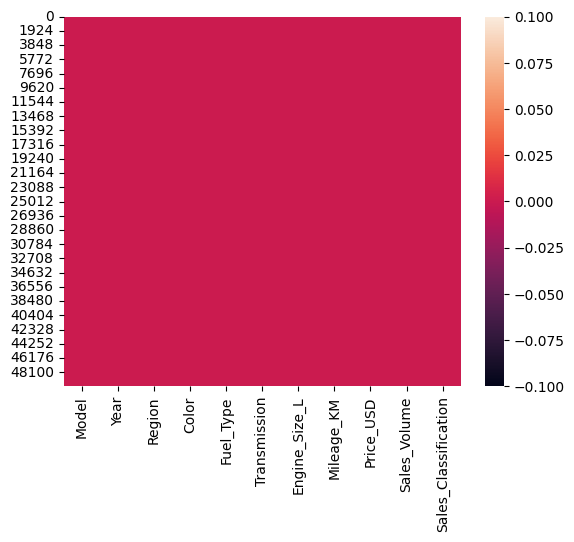

In [196]:
sns.heatmap(dataset.isnull())

In [197]:
dataset.head(3)


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740.0,8300.0,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219.0,3428.0,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265.0,6994.0,Low


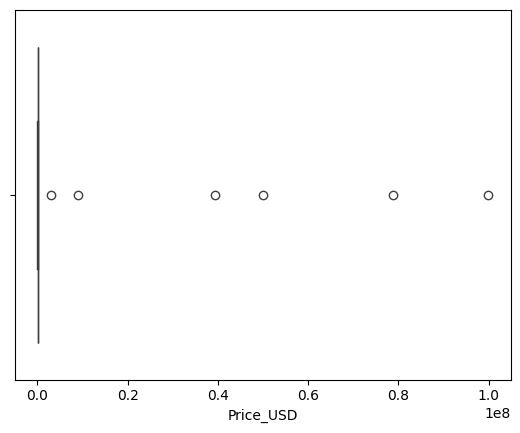

In [198]:
sns.boxplot(x= "Price_USD", data = dataset)#before removing outlier
plt.show()

In [199]:
dataset["Price_USD"].max()

np.float64(99899938.0)

In [200]:
dataset["Price_USD"].min()

np.float64(30000.0)

In [201]:
Q1 = dataset["Price_USD"].quantile(0.25)
Q1

np.float64(52443.0)

In [202]:
Q3 = dataset["Price_USD"].quantile(0.75)
Q3

np.float64(97629.0)

In [203]:
IQR = Q3 - Q1

In [204]:
IQR

np.float64(45186.0)

In [205]:
min_range = Q1 -(1.5 * IQR)
min_range

np.float64(-15336.0)

In [206]:
max_range = Q3 + (1.5 * IQR)

In [207]:
max_range

np.float64(165408.0)

In [208]:
dataset = dataset[dataset["Price_USD"] >= max_range]

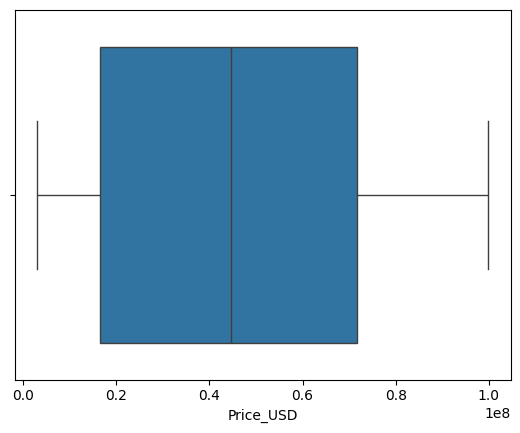

In [209]:
sns.boxplot(x= "Price_USD", data = dataset)# after removing outlier
plt.show()

In [211]:
dataset["Price_USD"].mean()

np.float64(46685288.5)

In [212]:
dataset["Price_USD"].median()

np.float64(44663566.0)

In [214]:
dataset["Price_USD"].mode()[0]

np.float64(3029222.0)

In [215]:
dataset["Price_USD"].min()

np.float64(3029222.0)

In [216]:
dataset["Price_USD"].max()

np.float64(99899938.0)

In [217]:
dataset.shape

(6, 11)

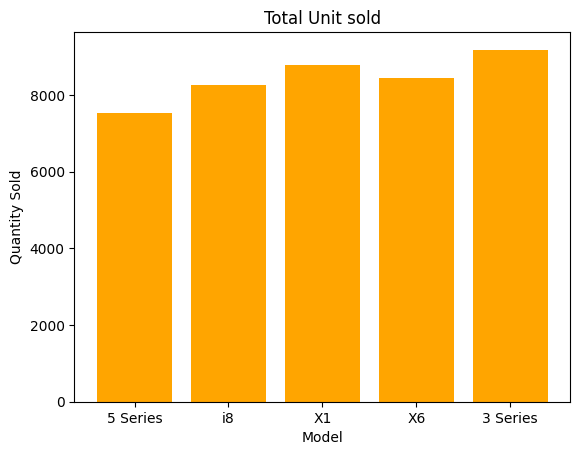

In [226]:
categories = dataset["Model"]
values = dataset["Sales_Volume"]

# Create bar chart
plt.bar(categories, values, color='orange' )

# Add labels
plt.title('Total Unit sold')
plt.xlabel('Model')
plt.ylabel('Quantity Sold')

# Show the chart
plt.show()

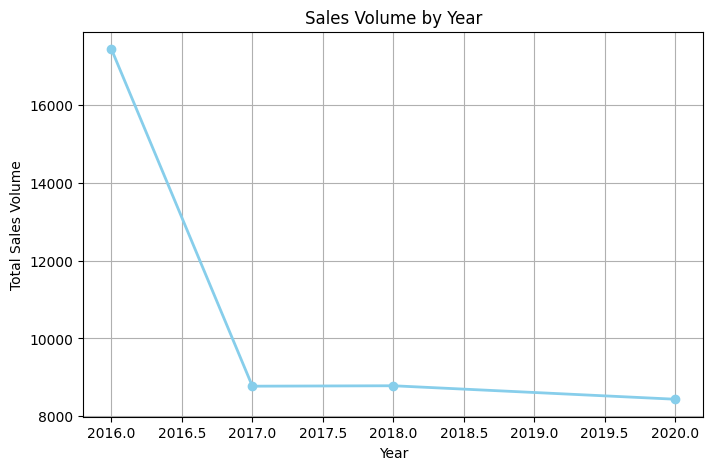

In [252]:
yearly_sales = dataset.groupby("Year")["Sales_Volume"].sum()
plt.figure(figsize=(8,5))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', color='skyblue', linewidth=2)
plt.title('Sales Volume by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales Volume')
plt.grid(True)
plt.show()
